# **<p style="font-family:newtimeroman;font-size:200%;text-align:center;color:#06445e;">Recurrent Neural Network </p>**

# Business Requirement: Predict the Google stock opening price for 2017 January Month

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [50]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### **Feature Scaling**

In [53]:
from sklearn.preprocessing import MinMaxScaler # Ranges between 0 to 1
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [55]:
training_set.shape

(1258, 1)

In [82]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### **Creating a data structure with 60 timesteps and 1 output**

**60 is a window size using the past 60 data points to predict the next one**

In [68]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [87]:
X_train.shape

(1198, 60)

In [89]:
y_train.shape

(1198,)

### **Reshaping**

In [98]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #this line is a critical step before feeding data into an RNN or LSTM model in Keras/TensorFlow.
#This reshapes the X_train array into a 3D structure, which is required by RNN-based layers.

In [104]:
X_train.shape

(1198, 60, 1)

### **Building and training the RNN**

In [107]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### **Initialising the RNN**

In [110]:
regressor = Sequential()

### **Adding the first LSTM layer and some Dropout regularisation**

In [113]:
regressor.add(LSTM(units= 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

C:\Users\SONIA\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### **Adding the Second LSTM layer and some Dropout regularisation**

In [116]:
regressor.add(LSTM(units= 50, return_sequences = True))
regressor.add(Dropout(0.2))

### **Adding the Third LSTM layer and some Dropout regularisation**

In [119]:
regressor.add(LSTM(units= 50, return_sequences = True))
regressor.add(Dropout(0.2))

### **Adding the fourth LSTM layer and some Dropout regularisation**

In [122]:
regressor.add(LSTM(units= 50))
regressor.add(Dropout(0.2))

### **Adding the output layer** 

In [125]:
regressor.add(Dense(units=1))

### **Compiling the RNN**

In [128]:
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

### **Fitting the RNN to the Training set**

In [131]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32 )

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - loss: 0.0843
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0061
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0053
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0044
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0046
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0052
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0043
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0055
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0043
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0050
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0041
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0047
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0042
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0036
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - l

In [136]:
pred = regressor.predict(X_train)

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


### **Evaluating the RNN**

In [147]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_train,pred))
rmse

0.026208746841810165

### **Making the predictions and visualising the results**

#### **Getting the real stock price of 2017 Jan month**

In [151]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [153]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [157]:
real_stock_price.shape

(20, 1)

### **Getting the predicted stock price of 2017**

In [175]:
dataset_total = pd.concat([dataset_train[["Open"]], dataset_test[["Open"]]], axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


**Combining the train and test data Because you need the 60 previous days before the test set starts, and those days are in the training data.**

**You're selecting the last 60 days before test set + the full test set.So, if dataset_test has 20 days, you're taking:60 (past days) + 20 (test days) = 80 rows total.**

**reshape(-1, 1) makes it 2D so the scaler can work.Then you scale it using the same scaler (sc) used for training data, to maintain consistency.**

**You create input sequences of 60 time steps.You slide from i = 60 to i = 79 (which gives you 20 test sequences).Each sequence is shaped (60,), so you get 20 sequences of length 60.**

**Final shape becomes (20, 60, 1) — ready for LSTM input:**

**Our Trained LSTM model (regressor) makes predictions on the test sequences.Output shape: (20, 1) — predicted values in scaled format.**

**Finally converting the predicted scaled values back to original price scale.Now you can compare predictions vs actual prices.**

### **Visualising the results**

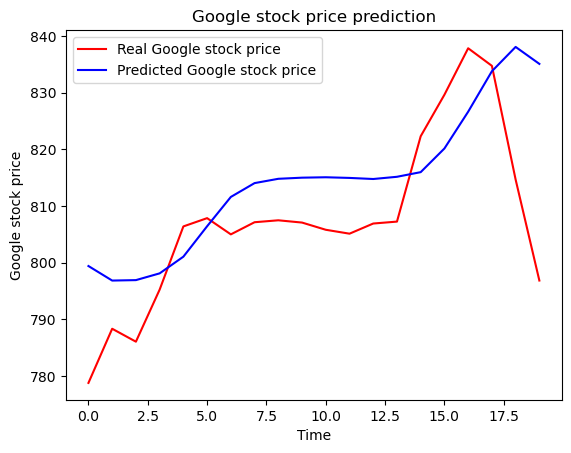

In [179]:
plt.plot(real_stock_price, color = "red", label = "Real Google stock price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Google stock price")
plt.title("Google stock price prediction")
plt.xlabel("Time")
plt.ylabel("Google stock price")
plt.legend()
plt.show()

# **<p style="font-family:newtimeroman;font-size:200%;text-align:center;color:#06445e;">Thank You </p>**

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">Behara Pavan Kumar </p>**